In [1]:
pip install numpy # type: ignore



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas # type: ignore


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('Loan.csv')

In [8]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
df.shape

(614, 13)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Loan_Status=le.fit_transform(df.Loan_Status)
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [16]:
x=df.iloc[:,1:12]
y=df.iloc[:,12]

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


<Axes: ylabel='count'>

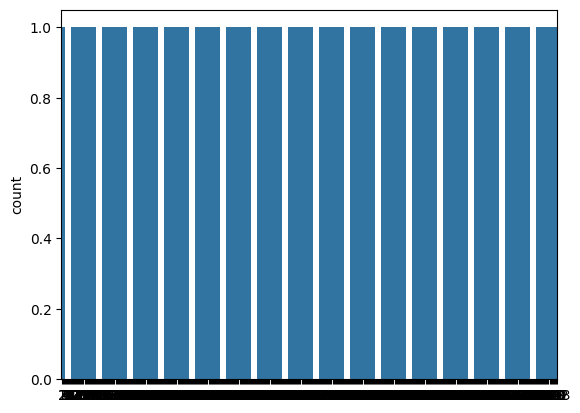

In [18]:
import seaborn as sns
sns.countplot(df['Loan_Status'])

In [19]:
df['Loan_Status'].value_counts()

Loan_Status
1    332
0    148
Name: count, dtype: int64

In [20]:
# prediction using Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))



0.7604166666666666
              precision    recall  f1-score   support

           0       1.00      0.34      0.51        35
           1       0.73      1.00      0.84        61

    accuracy                           0.76        96
   macro avg       0.86      0.67      0.68        96
weighted avg       0.83      0.76      0.72        96



/Users/sakshamsharma/Downloads/mlops/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# hyperparameter tuning

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000]}
grid = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=2)
grid.fit(x_train,y_train)

grid_predictions = grid.predict(x_test)
print(classification_report(y_test,grid_predictions))


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ...............................................C=10; total time=   0.0s
[CV] END ........................................

/Users/sakshamsharma/Downloads/mlops/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sakshamsharma/Downloads/mlops/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [22]:
# increasing the accuracy of the model using Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7708333333333334


In [23]:
#improving the accuracy of the model using Random Forest Classifier

param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
grid = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=2)
grid.fit(x_train,y_train)

grid_predictions = grid.predict(x_test)
print(accuracy_score(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500; total time=   0.0

/Users/sakshamsharma/Downloads/mlops/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sakshamsharma/Downloads/mlops/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sakshamsharma/Downloads/mlops/myenv/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/sakshamsharma/Downloads/mlops/myenv/lib/python3.12/site-packages/sklearn/base.py"

0.7604166666666666
              precision    recall  f1-score   support

           0       0.88      0.40      0.55        35
           1       0.74      0.97      0.84        61

    accuracy                           0.76        96
   macro avg       0.81      0.68      0.69        96
weighted avg       0.79      0.76      0.73        96



In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, refit=True, verbose=2)
grid.fit(x_train, y_train)

grid_predictions = grid.predict(x_test)
print(accuracy_score(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500; total time=   0.0

/Users/sakshamsharma/Downloads/mlops/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sakshamsharma/Downloads/mlops/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sakshamsharma/Downloads/mlops/myenv/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/sakshamsharma/Downloads/mlops/myenv/lib/python3.12/site-packages/sklearn/base.py"

In [25]:
print(grid.best_params_)
print(grid.best_estimator_)
# print accuracy
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 200}
RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=200)
0.8282638414217363


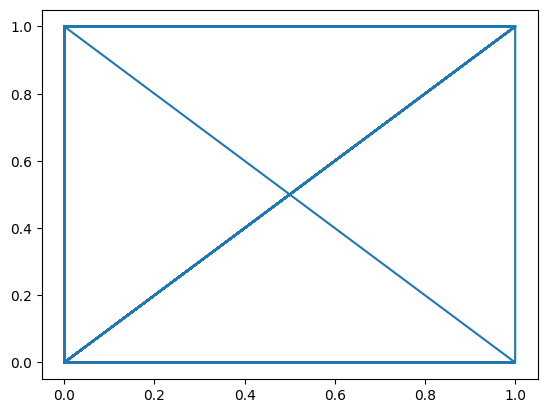

In [26]:
import matplotlib.pyplot as plt
plt.plot(y_test, y_pred)
plt.show()

[[15 20]
 [ 2 59]]


<Axes: >

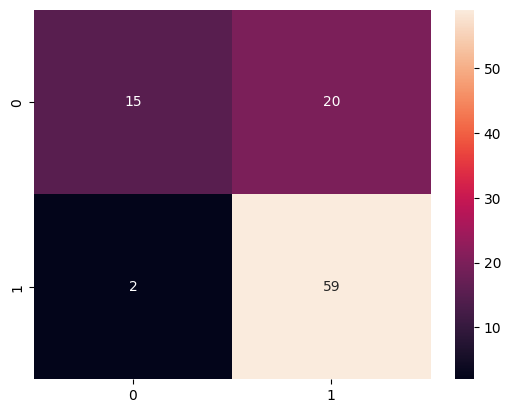

In [27]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

import seaborn as sns
sns.heatmap(cm, annot=True)
